In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temizveri/undersampled_data.csv
/kaggle/input/stemmeddata/StemmedData.csv


In [46]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate,train_test_split
from sklearn.preprocessing import LabelEncoder
import string
import nltk
from nltk.tokenize import word_tokenize
import snowballstemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from snowballstemmer import TurkishStemmer

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# df=pd.read_csv("/kaggle/input/temizveri/undersampled_data.csv")

In [ ]:
#df

In [ ]:
# dff=df.copy()

In [ ]:
# dff['haber'] = dff['haber'].apply(word_tokenize)

In [ ]:
# dn=dff.copy()

In [ ]:
#dn

## Stemming

In [ ]:
#stemmer = TurkishStemmer()
#dn["haber"] = dn["haber"].apply(lambda x: [stemmer.stemWord(word) for word in x])

In [ ]:
#dn.to_csv("StemmedData.csv")

In [18]:
dn=pd.read_csv("/kaggle/input/stemmeddata/StemmedData.csv")

In [19]:
dn

,words,haber,sinif
0,133,"['şekl', 'konuş', 'avrup', 'alışık', 'olmadık'...",Siyaset
1,133,"['nelik', 'olsa', 'mesel', 'değil', 'ülke', 'c...",Siyaset
2,125,"['rde', 'vicdan', 'kabul', 'görmeyecek', 'siya...",Siyaset
3,141,"['chp', 'kıza', 'hdp', 'il', 'aday', 'çıkaraca...",Siyaset
4,136,"['gökha', 'montrö', 'biz', 'güvence', 'dolayıs...",Siyaset
...,...,...,...
280671,139,"['kuşadas', 'bodr', 'milas', 'mevs', 'normalle...",Çevre
280672,122,"['mas', 'amaç', 'çalışma', 'yürütülmek', 'deni...",Çevre
280673,130,"['i', 'böl', 'başka', 'prof', 'süleyma', 'yüce...",Çevre
280674,606,"['patar', 'özel', 'çevre', 'kor', 'bölges', 'n...",Çevre


In [5]:
!nvidia-smi

Sun May 19 13:58:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Data Split

In [20]:
news_dict={'Magazin':0,'Siyaset':1,'Sağlık':2,'Spor':3,'Kültür-Sanat':4,'Turizm':5,'Finans-Ekonomi':6,'Bilim-Teknoloji':7,'Çevre':8} 
dn["sinif"]=dn["sinif"].map(news_dict)


In [31]:
# `haber` sütunundaki listeleri string'e dönüştürme
def convert_to_string(s):
    s = s.strip('[]')  # Köşeli parantezleri kaldır
    s = s.replace('...', '')  # Üç nokta yer tutucusunu kaldır
    return ' '.join(s.split(','))  # Virgüllerle ayrılmış kelimeleri birleştir

dn['haber'] = dn['haber'].apply(convert_to_string)

In [32]:
dn

,words,haber,sinif
0,133,şekl konuş avrup alışık olmadık belir şentop d...,1
1,133,nelik olsa mesel değil ülke cumhurbaşka fatura...,1
2,125,rde vicdan kabul görmeyecek siyase sorgulanaca...,1
3,141,chp kıza hdp il aday çıkaracak chp hdp örtül i...,1
4,136,gökha montrö biz güvence dolayıs alternatif ol...,1
...,...,...,...
280671,139,kuşadas bodr milas mevs normaller üzer gerçekl...,8
280672,122,mas amaç çalışma yürütülmek denil beledi ekip ...,8
280673,130,i böl başka prof süleyma yücel şenyurt başkanl...,8
280674,606,patar özel çevre kor bölges nden geçtik şubat ...,8


In [33]:
X = dn["haber"]
y = dn["sinif"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Count Vectorizer

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)

CountVectorizer()

In [35]:
X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

## TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(X_train)

TfidfVectorizer()

In [37]:
X_train_tf_idf = tf_idf_vectorizer.transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# **Models**

## **XGBoost**

## Count Vectorizer

In [38]:
!pip install xgboost

In [60]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_count, label=y_train)
dtest = xgb.DMatrix(X_test_count, label=y_test)


params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 30
bstCV = xgb.train(params, dtrain, num_round)


In [61]:

preds = bst.predict(dtest)


accuracy = (preds == y_test).mean()
print("XGBoost CV Accuracy:", accuracy)

XGBoost CV Accuracy: 0.843414130137881


In [62]:
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)

print("XGBoost CV Classification Report:")
print(report)

XGBoost CV Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      7653
           1       0.79      0.78      0.79      7567
           2       0.90      0.94      0.92     15350
           3       0.96      0.96      0.96      7666
           4       0.78      0.86      0.82     15253
           5       0.85      0.78      0.82      7653
           6       0.87      0.83      0.85      7807
           7       0.86      0.84      0.85      7591
           8       0.77      0.71      0.74      7663

    accuracy                           0.84     84203
   macro avg       0.85      0.83      0.84     84203
weighted avg       0.84      0.84      0.84     84203



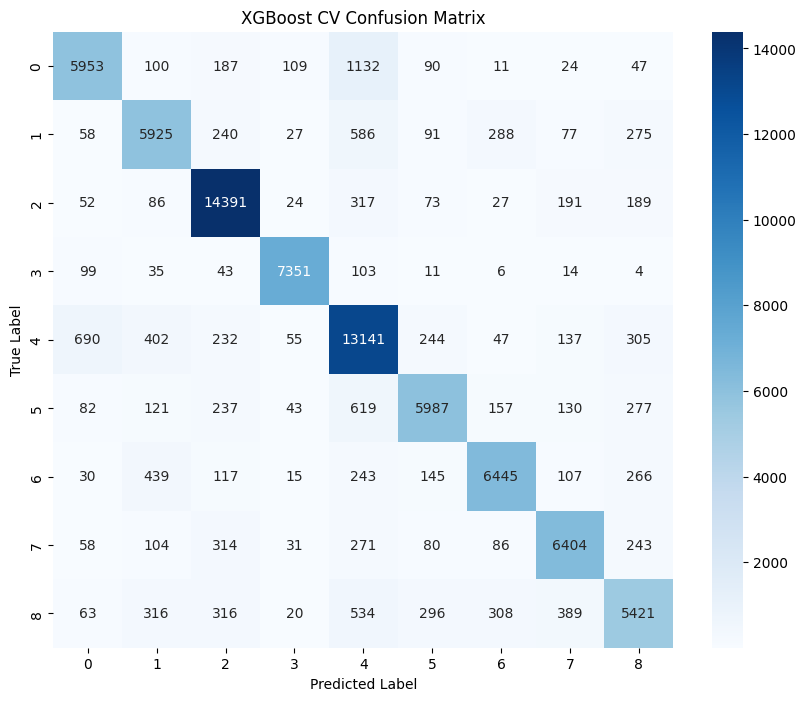

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost CV Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## TF-IDF 

In [68]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_tf_idf, label=y_train)
dtest = xgb.DMatrix(X_test_tf_idf, label=y_test)

params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 30
bstTF = xgb.train(params, dtrain, num_round)

In [72]:
# Test setinde tahmin yapma
preds = bst.predict(dtest)

# Doğruluk oranını hesaplama
accuracy = (preds == y_test).mean()
print("XGBoost TF-IDF Accuracy:", accuracy)

XGBoost TF-IDF Accuracy: 0.8307661247223971


In [70]:
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)

print("XGBoost TF-IDF Classification Report:")
print(report)

XGBoost TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      7653
           1       0.76      0.79      0.77      7567
           2       0.89      0.93      0.91     15350
           3       0.97      0.93      0.95      7666
           4       0.75      0.87      0.80     15253
           5       0.86      0.77      0.81      7653
           6       0.86      0.82      0.84      7807
           7       0.88      0.74      0.80      7591
           8       0.75      0.70      0.73      7663

    accuracy                           0.83     84203
   macro avg       0.84      0.82      0.82     84203
weighted avg       0.83      0.83      0.83     84203



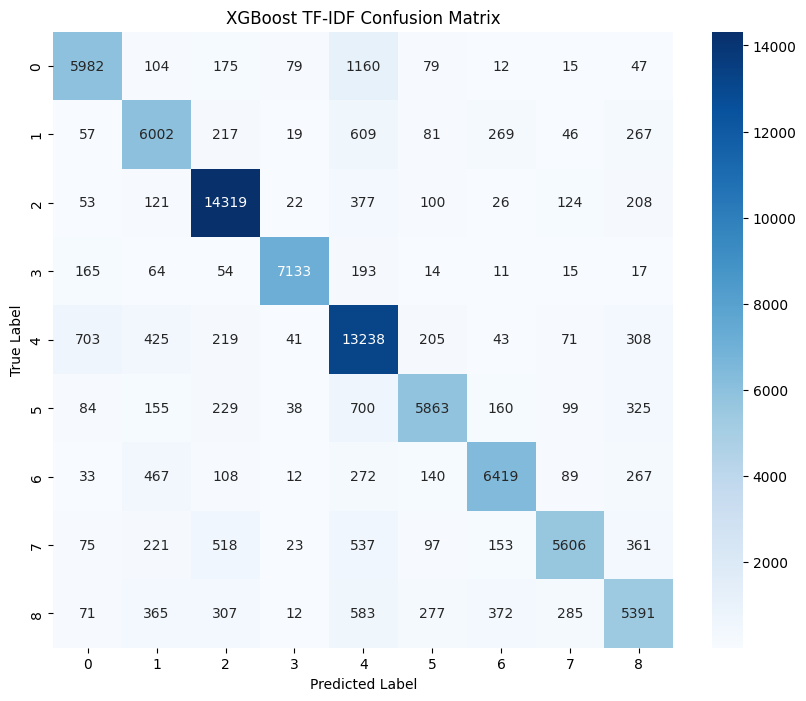

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost TF-IDF Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **LightGBM**

In [97]:
!pip install lightgbm


In [98]:
import lightgbm as lgb

In [103]:
# LightGBM Dataset formatına dönüştürme
dtrain = lgb.Dataset(X_train_count.astype(float), label=y_train)
dtest = lgb.Dataset(X_test_count.astype(float), label=y_test, reference=dtrain)


# Model parametreleri
params = {
    'objective': 'multiclass',
    'num_class': 9,
    'metric': 'multi_logloss',
    'device': 'gpu',  
    
}

num_round = 20
lgbModel = lgb.train(params, dtrain, num_round, valid_sets=[dtest])

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 205082
[LightGBM] [Info] Number of data points in the train set: 196473, number of used features: 39868
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 4 dense feature groups (0.75 MB) transferred to GPU in 0.001702 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -2.397793
[LightGBM] [Info] Start training from score -2.392991
[LightGBM] [Info] Start training from score -1.705879
[LightGBM] [Info] Start training from score -2.398522
[LightGBM] [Info] Start training from score -1.703164
[LightGBM] [Info] Start training from score -2.397793
[LightGBM] [Info] Start training from score -2.406452
[LightGBM] [Info] Start training from score -2.394329
[LightGBM] [Info] Start training from score -2.398353


In [113]:

y_pred = lgbModel.predict(X_test_count.astype(float))

y_pred_class = np.argmax(y_pred, axis=1)


print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_class))


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      7653
           1       0.78      0.79      0.79      7567
           2       0.88      0.95      0.91     15350
           3       0.94      0.97      0.96      7666
           4       0.80      0.86      0.83     15253
           5       0.85      0.79      0.82      7653
           6       0.87      0.83      0.85      7807
           7       0.85      0.82      0.84      7591
           8       0.78      0.69      0.73      7663

    accuracy                           0.84     84203
   macro avg       0.84      0.83      0.84     84203
weighted avg       0.84      0.84      0.84     84203



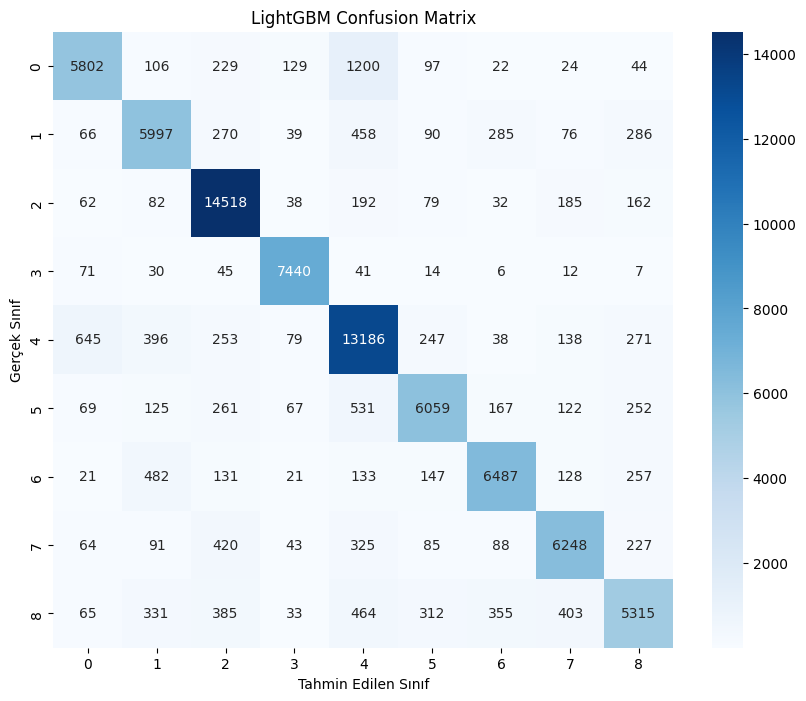

In [112]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = lgbModel.predict(X_test_count.astype(float))
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_class)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('LightGBM Confusion Matrix')
plt.show()


# **KNN**

# **Spacy**

# **BERT**

In [ ]:
!pip install transformers
!pip install torch

In [75]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_texts, test_texts, train_labels, test_labels = train_test_split(dn['haber'], dn['sinif'], test_size=0.3, random_state=42)


tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128, return_tensors='pt')
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Verileri tensorlere dönüştürme
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_labels))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(test_labels))

# DataLoader'ları oluşturma
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


KeyboardInterrupt: 

In [ ]:
BertModel = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=9)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

In [ ]:
# Optimizasyon ve loss fonksiyonu tanımlama
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
model.train()
for epoch in range(10): 
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()